https://mp.weixin.qq.com/s/H-RW9z-hQ864xvlmIMY8hQ

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Activation,LeakyReLU
from keras.layers.noise import AlphaDropout
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.optimizers import Adam

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
def preprocess_mnist(x_train,y_train,x_test,y_test):
    x_train = x_train.reshape(x_train.shape[0],28,28,1)
    x_test = x_test.reshape(x_test.shape[0],28,28,1)
    input_shape = (28,28,1)
    
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    
    x_train /= 255
    x_test /= 255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train,y_train,x_test,y_test,input_shape

In [4]:
x_train, y_train, x_test, y_test, input_shape = preprocess_mnist(x_train, y_train, x_test, y_test)

In [5]:
def build_cnn(activation,dropout_rate,optimizer):
    model = Sequential()
    if (activation == 'selu'):
        model.add(Conv2D(32,kernel_size=(3,3),activation=activation,input_shape=input_shape,kernel_initializer='lecun_normal'))
        model.add(Conv2D(64,kernel_size=(3,3),activation=activation,kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(AlphaDropout(0.25))
        model.add(Flatten())
        model.add(Dense(128,activation=activation,kernel_initializer='lecun_normal'))
        model.add(AlphaDropout(0.5))
        model.add(Dense(10,activation='softmax'))
    else:
        model.add(Conv2D(32,kernel_size=(3,3),activation=activation,input_shape=input_shape))
        model.add(Conv2D(64,kernel_size=(3,3),activation=activation))
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128,activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(10,activation='softmax'))
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = optimizer,
        metrics = ['accuracy']
    )
    return model

In [6]:
# Add the GELU function to keras
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))
get_custom_objects().update({'gelu': Activation(gelu)})
# Add leaky-relu so we can use it as a string
get_custom_objects().update({'leaky-relu': Activation(LeakyReLU(alpha=0.2))})
act_func = ['sigmoid', 'relu', 'elu', 'leaky-relu', 'selu', 'gelu']

C:\Users\jianghaitao1\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


In [7]:
result = []
for activation in act_func:
    print('\nTraining with -->{0}<-- activation function\n'.format(activation))

    model = build_cnn(activation=activation,
                      dropout_rate=0.2,
                      optimizer=Adam(clipvalue=0.5))

    history = model.fit(x_train, y_train,
                        validation_split=0.20,
                        batch_size=128,  # 128 is faster, but less accurate. 16/32 recommended
                        epochs=100,
                        verbose=1,
                        validation_data=(x_test, y_test))
    result.append(history)
    K.clear_session()
    del model
print(result)


Training with -->sigmoid<-- activation function

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 139us/step - loss: 0.2855 - acc: 0.9095 - val_loss: 0.1000 - val_acc: 0.9714
Epoch 2/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.1045 - acc: 0.9643 - val_loss: 0.0610 - val_acc: 0.9806
Epoch 3/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0828 - acc: 0.9722 - val_loss: 0.0465 - val_acc: 0.9850
Epoch 4/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0679 - acc: 0.9775 - val_loss: 0.0347 - val_acc: 0.9888
Epoch 5/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0529 - acc: 0.9828 - val_loss: 0.0260 - val_acc: 0.9915
Epoch 6/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0407 - acc: 0.9870 - val_loss: 0.0187 - val_acc: 0.9937
Epoch 7/100
60000/60000 [==============================] - 3s 58us/step

60000/60000 [==============================] - 3s 58us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0072 - val_acc: 0.9978
Epoch 60/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0080 - val_acc: 0.9978
Epoch 61/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0030 - acc: 0.9989 - val_loss: 0.0073 - val_acc: 0.9979
Epoch 62/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0077 - val_acc: 0.9979
Epoch 63/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0080 - val_acc: 0.9977
Epoch 64/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0082 - val_acc: 0.9978
Epoch 65/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0027 - acc: 0.9991 - val_loss: 0.0079 - val_acc: 0.9978
Epoch 66/100
60000/60000 [==============

60000/60000 [==============================] - 5s 79us/step - loss: 0.0028 - acc: 0.9990 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 18/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0053 - val_acc: 0.9987
Epoch 19/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0029 - acc: 0.9990 - val_loss: 0.0057 - val_acc: 0.9985
Epoch 20/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0052 - val_acc: 0.9987
Epoch 21/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0059 - val_acc: 0.9986
Epoch 22/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0022 - acc: 0.9993 - val_loss: 0.0062 - val_acc: 0.9986
Epoch 23/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0054 - val_acc: 0.9986
Epoch 24/100
60000/60000 [=============

Epoch 76/100
60000/60000 [==============================] - 3s 57us/step - loss: 9.5481e-04 - acc: 0.9997 - val_loss: 0.0087 - val_acc: 0.9987
Epoch 77/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0078 - val_acc: 0.9987
Epoch 78/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0011 - acc: 0.9996 - val_loss: 0.0079 - val_acc: 0.9986
Epoch 79/100
60000/60000 [==============================] - 3s 58us/step - loss: 8.5345e-04 - acc: 0.9997 - val_loss: 0.0078 - val_acc: 0.9988
Epoch 80/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0010 - acc: 0.9996 - val_loss: 0.0085 - val_acc: 0.9987
Epoch 81/100
60000/60000 [==============================] - 3s 57us/step - loss: 8.9947e-04 - acc: 0.9997 - val_loss: 0.0081 - val_acc: 0.9987
Epoch 82/100
60000/60000 [==============================] - 3s 58us/step - loss: 8.3415e-04 - acc: 0.9998 - val_loss: 0.0090 - val_acc: 0.9986
Epoch 83/10

Epoch 34/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0044 - acc: 0.9986 - val_loss: 0.0095 - val_acc: 0.9980
Epoch 35/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0036 - acc: 0.9988 - val_loss: 0.0084 - val_acc: 0.9980
Epoch 36/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0092 - val_acc: 0.9980
Epoch 37/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0101 - val_acc: 0.9979
Epoch 38/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0089 - val_acc: 0.9978
Epoch 39/100
60000/60000 [==============================] - 4s 59us/step - loss: 0.0039 - acc: 0.9987 - val_loss: 0.0101 - val_acc: 0.9980
Epoch 40/100
60000/60000 [==============================] - 4s 62us/step - loss: 0.0036 - acc: 0.9989 - val_loss: 0.0119 - val_acc: 0.9976
Epoch 41/100
60000/60000 [=

Epoch 93/100
60000/60000 [==============================] - 3s 57us/step - loss: 0.0026 - acc: 0.9993 - val_loss: 0.0138 - val_acc: 0.9979
Epoch 94/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0036 - acc: 0.9990 - val_loss: 0.0140 - val_acc: 0.9978
Epoch 95/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.0150 - val_acc: 0.9977
Epoch 96/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0135 - val_acc: 0.9978
Epoch 97/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0032 - acc: 0.9990 - val_loss: 0.0154 - val_acc: 0.9976
Epoch 98/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0027 - acc: 0.9992 - val_loss: 0.0145 - val_acc: 0.9978
Epoch 99/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0155 - val_acc: 0.9979
Epoch 100/100
60000/60000 [

60000/60000 [==============================] - 4s 69us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0084 - val_acc: 0.9982
Epoch 52/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0017 - acc: 0.9994 - val_loss: 0.0081 - val_acc: 0.9985
Epoch 53/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0080 - val_acc: 0.9982
Epoch 54/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0087 - val_acc: 0.9981
Epoch 55/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0092 - val_acc: 0.9981
Epoch 56/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0015 - acc: 0.9995 - val_loss: 0.0083 - val_acc: 0.9982
Epoch 57/100
60000/60000 [==============================] - 4s 69us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0098 - val_acc: 0.9981
Epoch 58/100
60000/60000 [==============

60000/60000 [==============================] - 5s 80us/step - loss: 0.0101 - acc: 0.9967 - val_loss: 0.0180 - val_acc: 0.9977
Epoch 10/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0102 - acc: 0.9967 - val_loss: 0.0178 - val_acc: 0.9978
Epoch 11/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.0092 - acc: 0.9969 - val_loss: 0.0206 - val_acc: 0.9974
Epoch 12/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0092 - acc: 0.9970 - val_loss: 0.0142 - val_acc: 0.9979
Epoch 13/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0088 - acc: 0.9971 - val_loss: 0.0159 - val_acc: 0.9979
Epoch 14/100
60000/60000 [==============================] - 5s 80us/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0186 - val_acc: 0.9978
Epoch 15/100
60000/60000 [==============================] - 5s 79us/step - loss: 0.0082 - acc: 0.9973 - val_loss: 0.0181 - val_acc: 0.9977
Epoch 16/100
60000/60000 [==============

60000/60000 [==============================] - 5s 83us/step - loss: 0.0050 - acc: 0.9986 - val_loss: 0.0192 - val_acc: 0.9982
Epoch 69/100
60000/60000 [==============================] - 5s 87us/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.0208 - val_acc: 0.9982
Epoch 70/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0227 - val_acc: 0.9980
Epoch 71/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0231 - val_acc: 0.9980
Epoch 72/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.0049 - acc: 0.9986 - val_loss: 0.0224 - val_acc: 0.9980
Epoch 73/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.0051 - acc: 0.9986 - val_loss: 0.0230 - val_acc: 0.9980
Epoch 74/100
60000/60000 [==============================] - 5s 82us/step - loss: 0.0043 - acc: 0.9988 - val_loss: 0.0242 - val_acc: 0.9978
Epoch 75/100
60000/60000 [==============

60000/60000 [==============================] - 6s 96us/step - loss: 0.0025 - acc: 0.9991 - val_loss: 0.0070 - val_acc: 0.9982
Epoch 27/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0025 - acc: 0.9992 - val_loss: 0.0075 - val_acc: 0.9983
Epoch 28/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 29/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0026 - acc: 0.9991 - val_loss: 0.0067 - val_acc: 0.9984
Epoch 30/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0066 - val_acc: 0.9984
Epoch 31/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0024 - acc: 0.9992 - val_loss: 0.0063 - val_acc: 0.9983
Epoch 32/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0020 - acc: 0.9994 - val_loss: 0.0072 - val_acc: 0.9983
Epoch 33/100
60000/60000 [==============

60000/60000 [==============================] - 6s 97us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0101 - val_acc: 0.9985
Epoch 86/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0091 - val_acc: 0.9985
Epoch 87/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0014 - acc: 0.9995 - val_loss: 0.0087 - val_acc: 0.9984
Epoch 88/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0014 - acc: 0.9995 - val_loss: 0.0129 - val_acc: 0.9982
Epoch 89/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0096 - val_acc: 0.9986
Epoch 90/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 0.0102 - val_acc: 0.9983
Epoch 91/100
60000/60000 [==============================] - 6s 97us/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.0101 - val_acc: 0.9982
Epoch 92/100
60000/60000 [==============

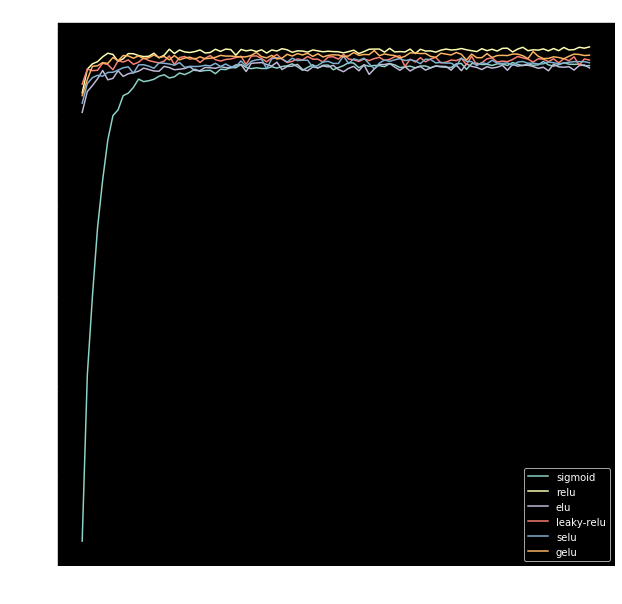

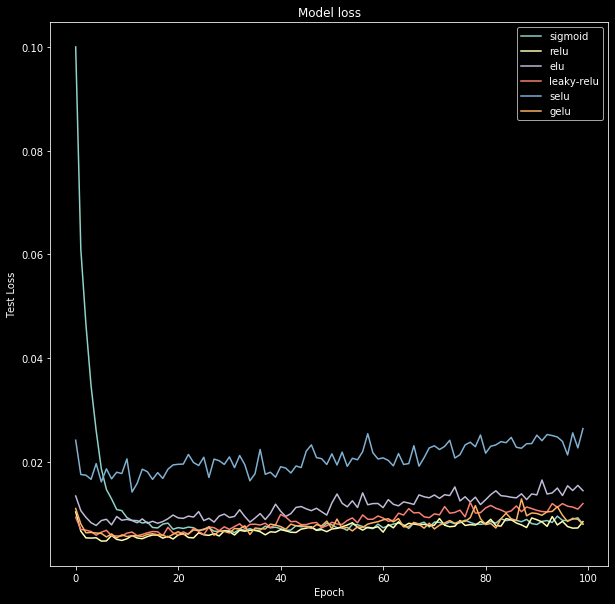

In [8]:
# graph the results
def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_acc'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(result, act_func)

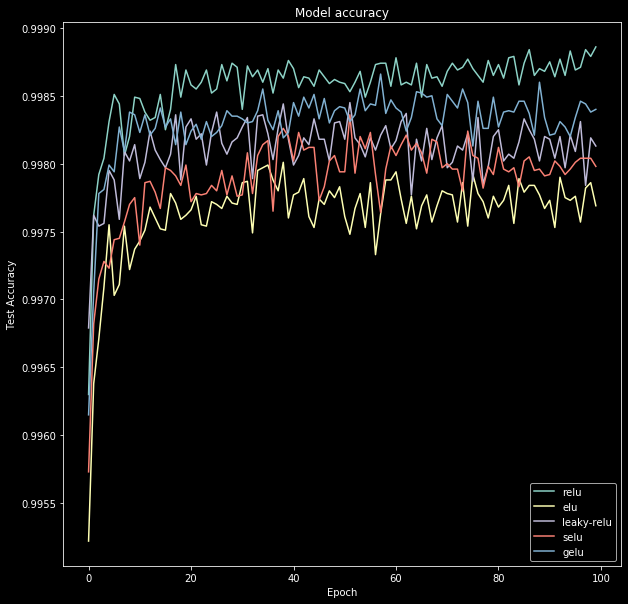

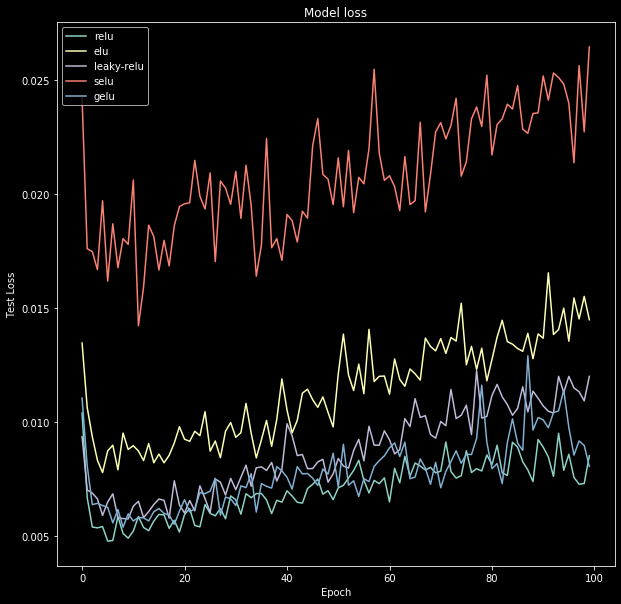

In [9]:

new_act_arr = act_func[1:]
new_results = result[1:]

def plot_act_func_results(results, activation_functions = []):
    plt.figure(figsize=(10,10))
    plt.style.use('dark_background')
    
    # Plot validation accuracy values
    for act_func in results:
        plt.plot(act_func.history['val_acc'])
        
    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

    # Plot validation loss values
    plt.figure(figsize=(10,10))
    
    for act_func in results:
        plt.plot(act_func.history['val_loss'])
        
    plt.title('Model loss')
    plt.ylabel('Test Loss')
    plt.xlabel('Epoch')
    plt.legend(activation_functions)
    plt.show()

plot_act_func_results(new_results, new_act_arr)